# Installing Dependencies

In [2]:
%pip install python-decouple --quiet
%pip install imouapi --quiet
%pip install matplotlib --quiet
%pip install numpy --quiet
%pip install pandas --quiet
%pip install opencv-python --quiet
%pip install pillow --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
from imouapi.api import ImouAPIClient
from imouapi.device import ImouDiscoverService
from imouapi.device import ImouDevice
from imouapi.device_entity import ImouCamera
from imouapi.const import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import json
from decouple import config
import time
import aiohttp
import io
import logging

_LOGGER: logging.Logger = logging.getLogger(__package__)

# Loading Config

In [4]:
# Load the configuration from the config.json file
config_file = 'config.json'
config_data = {}
try:
    with open(config_file) as json_file:
        config_data = json.load(json_file)
        
except Exception as e:
    print(f'Error: {e}')
    
# Get the configuration data
IMOU_APP_ID = config('IMOU_APP_ID', default=config_data.get('IMOU_APP_ID', ''))
IMOU_APP_SECRET = config('IMOU_APP_SECRET', default=config_data.get('IMOU_APP_SECRET', ''))

# Creating Client Session

In [5]:
session = aiohttp.ClientSession()

api_client = ImouAPIClient(
    app_id=IMOU_APP_ID,
    app_secret=IMOU_APP_SECRET,
    session=session
)

# Discovering Devices

In [6]:
discover_service = ImouDiscoverService(
    api_client=api_client
)

In [7]:
discovered_devices = await discover_service.async_discover_devices()

In [8]:
discovered_device = ""
for disc_device in discovered_devices:
    print(f"{disc_device}: {discovered_devices[disc_device].get_device_id()}")
    discovered_device = disc_device

Front Door: 6K0720CPAZ972BE


In [9]:
device = ImouDevice(
    api_client=api_client,
    device_id=discovered_devices[discovered_device].get_device_id(),
)

# Camera Device

## Initializing Camera

In [10]:
camera = ImouCamera(
    api_client=api_client,
    device_id=device.get_device_id(),
    device_name=device.get_name(),
    sensor_type="cameraSD",                 # cameraSD or cameraHD
    profile="SD",                           # SD or HD
)

## Getting Image From Camera

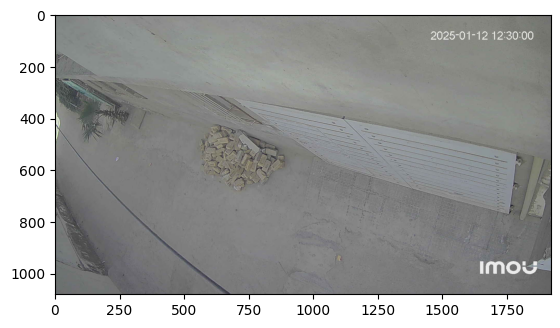

In [11]:
image = await camera.async_get_image()

image_stream = io.BytesIO(image)
image = Image.open(image_stream)

plt.imshow(image)
plt.show()

## Getting Video From Camera

In [12]:
video = await camera.async_get_stream_url()

# print(video)

## PTZ Stuff

- Will only work on PTZ cameras like the Cruiser, etc

In [18]:
await camera.async_update()
print( await camera.async_service_ptz_location(
    horizontal=0.5,
    vertical=0.5,
    zoom=0.5
))

await camera.async_update()
print(await camera.async_service_ptz_move(operation="up", duration=1))